# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

Considero que para valuar el precio de venta de una propiedad, en primer lugar es necesario conocer las características de la misma, dentro de las cuales se pueden mencionar: tipo de propiedad, superficie, cantidad de habitaciones, antigüedad, instalaciones, localización, acceso a servicios públicos, etc.; pero también pueden influir otros factores económicos, como por ejemplo: costo histórico de la propiedad, valor del dólar, nivel de inflación, forma de pago (financiado o no), como así también el costo de otras propiedades similares.

---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
#Importamos las librerías necesarias para analizar el dataset:
import pandas as pd
import numpy as np

#Herramientas para visualización de los datos:
import matplotlib.pyplot as plt
import seaborn as sns

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [2]:
#En primer lugar, cargamos el dataset utilizando las funcionalidades de pandas:

data_propiedades = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

#Vemos cuantas filas y columnas tiene el dataset, es decir, su "forma":

print(data_propiedades.shape)

(146660, 19)


Esto nos dice que el dataset tiene 146.660 filas y 19 columnas.

In [3]:
#Observamos las primeras cinco instancias:

data_propiedades.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [4]:
#Renombramos las columnas l1, l2 y l3 por los niveles administrativos correspondientes de la ubicación de las propiedades (país, región o barrio)

data_propiedades = data_propiedades.rename(columns={'l1':'País', 'l2':'Región', 'l3':'Barrio'})

#Observamos las primeras cinco instancias luego de los cambios realizados:

data_propiedades.head()


,start_date,end_date,created_on,lat,lon,País,Región,Barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [5]:
'''Por último, vemos la información general del dataset, donde ya podemos tener un pantallazo de los nombres de las columnas, 
tipos de datos que contiene cada una, y cantidad de instancias que contienen información por columna:'''

data_propiedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   País             146660 non-null  object 
 6   Región           146660 non-null  object 
 7   Barrio           146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [6]:
#Imprimimos en pantalla los nombres de las columnas del dataset:

print(data_propiedades.columns)

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'País', 'Región',
       'Barrio', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'currency', 'title', 'description',
       'property_type', 'operation_type'],
      dtype='object')


In [7]:
#Consultamos la cantidad de valores faltantes por columna:

print(data_propiedades.isnull().sum())

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
País                   0
Región                 0
Barrio                 0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


Como podemos ver, las únicas columnas con valores faltantes son 'lat', 'lon', 'bathrooms', 'surface_total' y 'surface_covered'

In [8]:
#Adicionalmente, chequeamos si el dataset contiene filas con datos duplicados:

filas_duplicadas = data_propiedades[data_propiedades.duplicated()]

#Chequeamos la cantidad de filas duplicadas:
print('Cantidad de filas duplicadas:', filas_duplicadas.shape[0])

Cantidad de filas duplicadas: 2358


Debido a que nuestro dataset contiene 2.358 filas duplicadas, esto puede distorsionar nuestro análisis, por lo que debemos eliminarlas.

In [9]:
#Eliminamos filas duplicadas:

data_propiedades = data_propiedades.drop_duplicates()

#Luego chequeamos la nueva forma de nuestro dataset:

data_propiedades.shape

(144302, 19)

Como podemos ver, nuestro dataset contiene ahora 2.358 filas menos.

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [10]:
#Analizamos cuáles son los tipos de propiedad que incluye el dataset:

data_propiedades['property_type'].unique()

array(['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina',
       'Otro', 'Local comercial', 'Cochera', 'Depósito'], dtype=object)

El dataset contiene 10 tipos de propiedades, las cuales son 'Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina', 'Otro', 'Local comercial', 'Cochera' y 'Depósito'.

In [11]:
'''Otra forma de verlo es considerando la cantidad de valores únicos por columna (en este caso, utilizando la función
que nos devuelve los valores únicos sin considerar los nulos)'''

data_propiedades.nunique()

start_date            366
end_date              412
created_on            366
lat                 59636
lon                 60075
País                    1
Región                  4
Barrio                 89
rooms                  25
bedrooms               16
bathrooms              14
surface_total        1843
surface_covered       876
price                6821
currency                1
title               77733
description        106668
property_type          10
operation_type          1
dtype: int64

Como podemos ver, la cantidad de valores únicos que contiene la columna 'property_type' es 10.

In [12]:
#A continuación, observamos la cantidad de instancias por tipo de propiedad:

tipos_prop = data_propiedades['property_type'].value_counts()
tipos_prop

Departamento       105276
Casa                21443
PH                  14103
Lote                 1308
Oficina               635
Otro                  374
Local comercial       325
Casa de campo         314
Depósito              265
Cochera               259
Name: property_type, dtype: int64

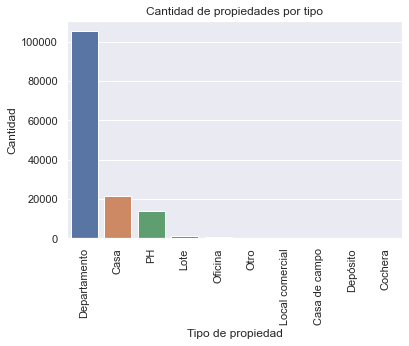

In [13]:
'''Antes de graficar, establecemos el orden en que queremos visualizar nuestro gráfico, esto es, descendente en función de la 
cantidad de propiedades de cada tipo. Para realizarlo, obtenemos los indices de la variable donde obtuvimos las cantidades de
cada tipo (las cuales ya están ordenadas en forma descendente):'''

orden = tipos_prop.index

'''Por último, vemos la cantidad de instancias por tipo de propiedad gráficamente, incluyendo el orden mencionado anteriormente como
parámetro:'''
sns.set()
plt.figure(figsize = (6,4))
sns.countplot(data = data_propiedades, x = 'property_type', order = orden)

#Rotamos las etiquetas del eje 'x' y agregamos título y leyenda a los ejes:
plt.xticks(rotation=90)
plt.xlabel('Tipo de propiedad')
plt.ylabel('Cantidad')
plt.title('Cantidad de propiedades por tipo');
plt.show()

A través de ambos métodos, podemos concluir que los tres tipos de propiedad con más instancias son Departamento, Casa y PH.

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

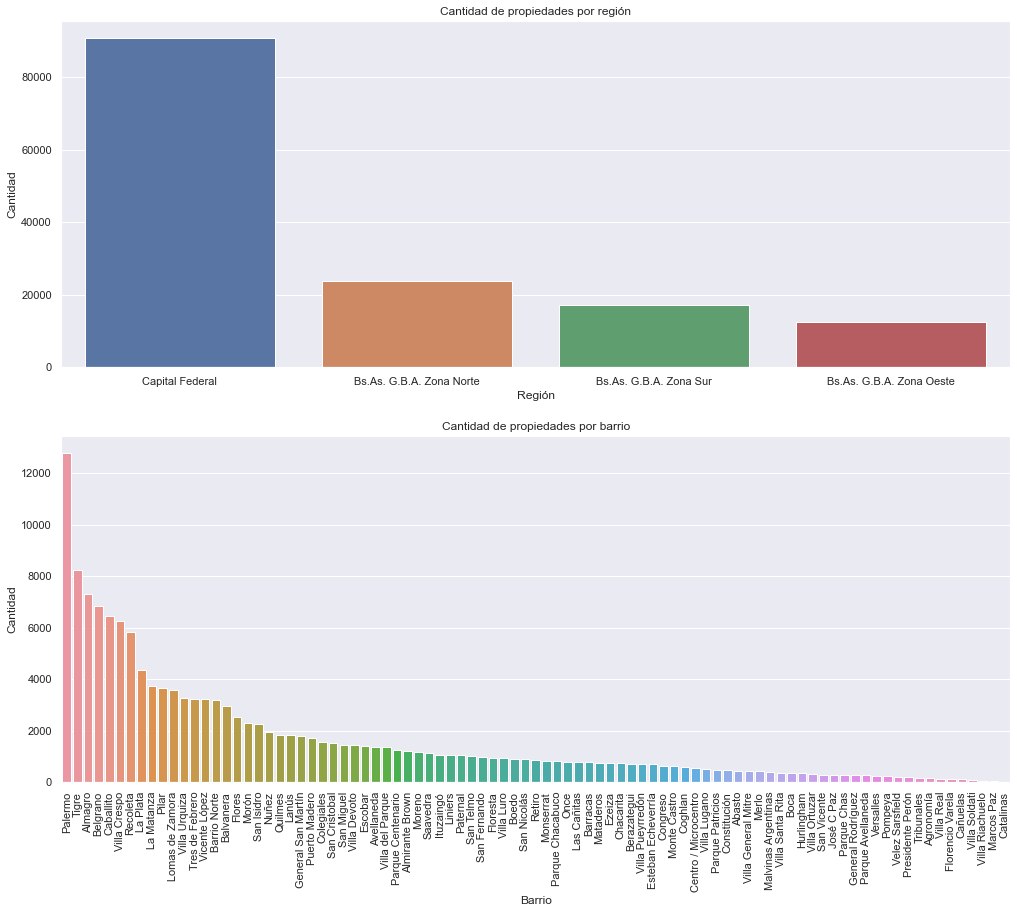

In [14]:
'''En primer lugar, cabe recordar que dentro del dataset las columnas l2 y l3 fueron renombradas como 'Región' y 'Barrio' 
respectivamente. Luego, al igual que hicimos anteriormente, vamos a establecer el orden descendente que le vamos a dar al gráfico:'''

#Orden para la región:
reg_prop = data_propiedades['Región'].value_counts()
orden_reg = reg_prop.index

#Orden para el barrio:
barr_prop = data_propiedades['Barrio'].value_counts()
orden_barr = barr_prop.index

#Establecemos el tamaño de la figura:
plt.figure(figsize = (17,14))

#Definimos el gráfico para la cantidad de publicaciones por región:
plt.subplot(2,1,1)
sns.countplot(data = data_propiedades, x = 'Región', order = orden_reg)
plt.xticks(rotation=0)
plt.xlabel('Región')
plt.ylabel('Cantidad')
plt.title('Cantidad de propiedades por región')

#Definimos el gráfico para la cantidad de publicaciones por barrio:
plt.subplot(2,1,2)
sns.countplot(data = data_propiedades, x = 'Barrio', order = orden_barr)
plt.xticks(rotation=90)
plt.xlabel('Barrio')
plt.ylabel('Cantidad')
plt.title('Cantidad de propiedades por barrio')

plt.show()


Realizando el análisis por región, vemos que la que contiene más publicaciones es Capital Federal, mientras que al analizar por barrio, vemos que son los barrios de Palermo, Tigre y Almagro.

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [15]:
#En primer lugar, creamos un nuevo Data Frame que incluya los tipos de vivienda más populares:

data_prop1 = data_propiedades[(data_propiedades.property_type == 'Departamento') | (data_propiedades.property_type == 'Casa') | (data_propiedades.property_type == 'PH')]

#Posteriormente, filtramos del Data Frame creado las propiedades de Capital Federal (la región con más propiedades publicadas):

data_prop1 = data_prop1[data_prop1.Región == 'Capital Federal']

#Por último, imprimimos el shape del nuevo Data Frame llamado data_prop1:

print(data_prop1.shape)


(89874, 19)


In [16]:
#Observamos las primeras 5 instancias:
data_prop1.head()

,start_date,end_date,created_on,lat,lon,País,Región,Barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta


**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [17]:
#En primer lugar, eliminamos las columnas de latitud y longitud, ya que no van a ser de utilidad en nuestro análisis:

data_prop1.drop(columns = ['lat', 'lon'], inplace = True)

#Luego obtenemos los datos estadísticos de las variables numéricas de nuestro dataset:
data_prop1.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,89874.000000,89874.000000,87727.000000,81157.000000,80850.000000,8.987400e+04
mean,2.965129,1.960456,1.558562,112.885494,95.169746,2.587195e+05
std,1.317503,1.074358,0.858386,989.133753,785.177443,3.190762e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.782000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


Podemos ver que muchos de los valores máximos de las columnas no tienen mucho sentido, ya que el 75% de los datos tienen valores muy por debajo de los mismos, pero las de mayor diferencia son las variables de superficie total y cubierta y el precio. Por tal motivo, empezaremos a analizar la distribución de cada una de ellas para eliminar los outliers.

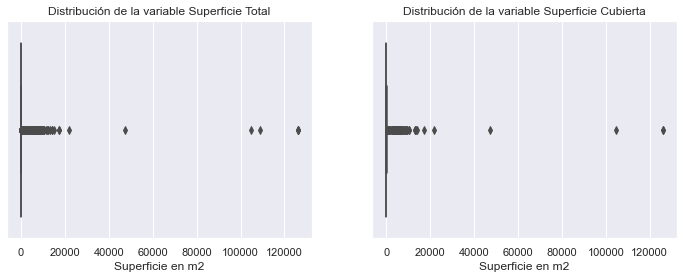

In [18]:
#En primer lugar, analizaremos la distribución de la variables mencionadas mediante el uso de boxplots:

#Establecemos el tamaño de la figura:
plt.figure(figsize = (12,4))
sns.set()

#Definimos el gráfico para la variable de superficie total:
plt.subplot(1,2,1)
sns.boxplot(x = data_prop1['surface_total'])
plt.xlabel('Superficie en m2');
plt.title('Distribución de la variable Superficie Total');

#Definimos el gráfico para la variable de superficie cubierta:
plt.subplot(1,2,2)
sns.boxplot(x = data_prop1['surface_covered'])
plt.xlabel('Superficie en m2');
plt.title('Distribución de la variable Superficie Cubierta');

plt.show()

En ambos casos observamos que la gran mayoría de datos se encuentran concentrados en valores muy inferiores, por lo cual deberíamos eliminar los outliers, ya que afectan las medidas estadísticas que analizábamos anteriormente. 

In [19]:
'''Una forma de realizar esto, es filtrar el dataset por sus percentiles, esto es una medida de posición usada en estadística que 
indica, una vez ordenados los datos de menor a mayor, el valor de la variable por debajo del cual se encuentra un porcentaje dado
de observaciones en un grupo. En nuestro caso, vamos a filtrar el dataset por el 85% de sus datos, es decir, el percentil 85.'''

#Para ello, en primer lugar vamos a conocer cúal es ese valor para cada uno de esas variables:

per85_ST = data_prop1.surface_total.quantile(0.85) 
per85_SC = data_prop1.surface_covered.quantile(0.85)

print('Percentil 85 de la variable surface_total:', per85_ST)
print('Percentil 85 de la variable surface_covered:', per85_SC)

Percentil 85 de la variable surface_total: 149.0
Percentil 85 de la variable surface_covered: 126.0


Esto nos quiere decir que el 85% de las propiedades de nuestro dataset tiene una superficie total máxima de 149 m2 y una superficie cubierta máxima de 126 m2.

In [20]:
#Luego filtramos nuestro dataset poniendo como límite los valores obtenidos anteriormente:

data_prop2 = data_prop1[(data_prop1.surface_total <= per85_ST) & (data_prop1.surface_covered <= per85_SC)]
data_prop2.shape

(66745, 17)

In [21]:
data_prop2.head()

,start_date,end_date,created_on,País,Región,Barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
1,2019-10-17,2019-11-21,2019-10-17,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta
6,2019-10-17,2019-10-31,2019-10-17,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH,Venta


In [22]:
'''Otro factor que deberíamos tener en cuenta es que los valores de supeficie cubierta no sean mayores al de superficie total
(ya que es físicamente imposible y no tendría sentido), por lo que vamos a filtrar el dataset nuevamente incluyendo esta condición:'''

data_prop2 = data_prop2[data_prop2.surface_total >= data_prop2.surface_covered]
data_prop2.shape

(66232, 17)

Comparandolo con el dataset anterior, podemos ver que existían 513 instancias que contenían información incorrecta.

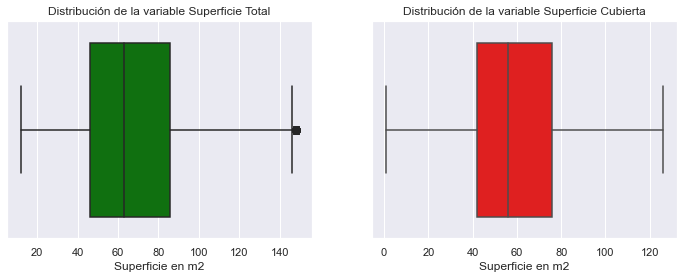

In [23]:
#Volvemos a graficar para analizar la distribución luego del filtrado:

#Establecemos el tamaño de la figura:
plt.figure(figsize = (12,4))
sns.set()

#Definimos el gráfico para la variable de superficie total:
plt.subplot(1,2,1)
sns.boxplot(x = data_prop2['surface_total'], color = 'green')
plt.xlabel('Superficie en m2')
plt.title('Distribución de la variable Superficie Total')

#Definimos el gráfico para la variable de superficie cubierta:
plt.subplot(1,2,2)
sns.boxplot(x = data_prop2['surface_covered'], color = 'red')
plt.xlabel('Superficie en m2')
plt.title('Distribución de la variable Superficie Cubierta')

plt.show()

Como podemos ver en este gráfico, el 50% de las propiedades incluidas en nuestro dataset tienen superficies entre 40 m2 y 90 m2.

Como se mención anteriormente, otra variable que alcanzaba valores muy elevados es el precio, por lo que a continuación se estudiará su distribución. Esta variable es muy importante en nuestro análisis, ya que predecir el precio es el objetivo de este modelo de Machine Leaning.

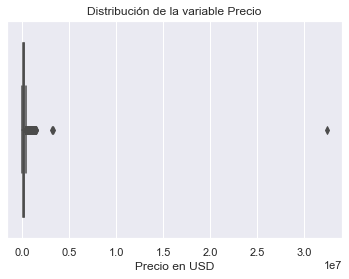

In [24]:
#En este caso, analizaremos la distribución de precios mediante un boxplot:

#Establecemos el tamaño de la figura:
plt.figure(figsize = (6,4))
sns.set()

#Definimos el gráfico para la variable precio:
sns.boxplot(x = data_prop2['price'])
plt.xlabel('Precio en USD')
plt.title('Distribución de la variable Precio')

plt.show()

Al igual que pasó con las variables de superficie, dentro de la variable Precio existen valores muy elevados que distorsionan los valores estadísticos obtenidos, por lo que tambíen vamos a filtrar al dataset en función a sus percentiles. Debido a la particularidad de la variable precio, que puede estar afectada por muchos factores y por tanto ser más volátil (y tomar valores más elevados), en este caso vamos a trabajar con el percentil 95, es decir, valor por el cual se encuentran el 95% de los precios publicados.

In [25]:
#Calculamos el percentil 85 de la variable Precio:

per95_P = data_prop2.price.quantile(0.95) 

print('Percentil 95 de la variable precio:', per95_P)

Percentil 95 de la variable precio: 379000.0


Esto quiere decir que el 95% de las propiedades publicadas tiene como máximo un precio de USD 379.000.

In [26]:
#Filtramos nuestro dataset poniendo como límite a la variable Precio el percentil 85:

data_prop3 = data_prop2[data_prop2.price <= per95_P]
data_prop3.shape

(62934, 17)

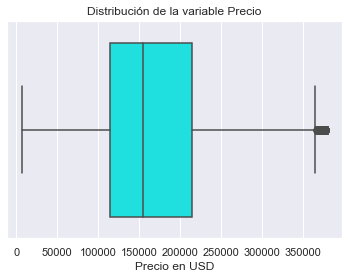

In [27]:
#Volvemos a graficar para analizar la distribución luego del filtrado:

#Establecemos el tamaño de la figura:
plt.figure(figsize = (6,4))
sns.set()

#Definimos el gráfico para la variable precio:
sns.boxplot(x = data_prop3['price'], color = 'cyan')
plt.xlabel('Precio en USD')
plt.title('Distribución de la variable Precio')

plt.show()

Con este gráfico podemos ver que el 50% de las propiedades de nuestro dataset se encuentran entre los 100.000 y 225.000 dólares.

Una vez filtrados los outliers que podían distorsionar nuestro análisis, en el siguiente paso estudiaremos las relaciones de a pares de las variables numéricas a través de un 'pairplot' de Seaborn, con el objetivo de identificar cuál/les de ellas está relacionada a la variable precio, objetivo del modelo de Machine Learning.

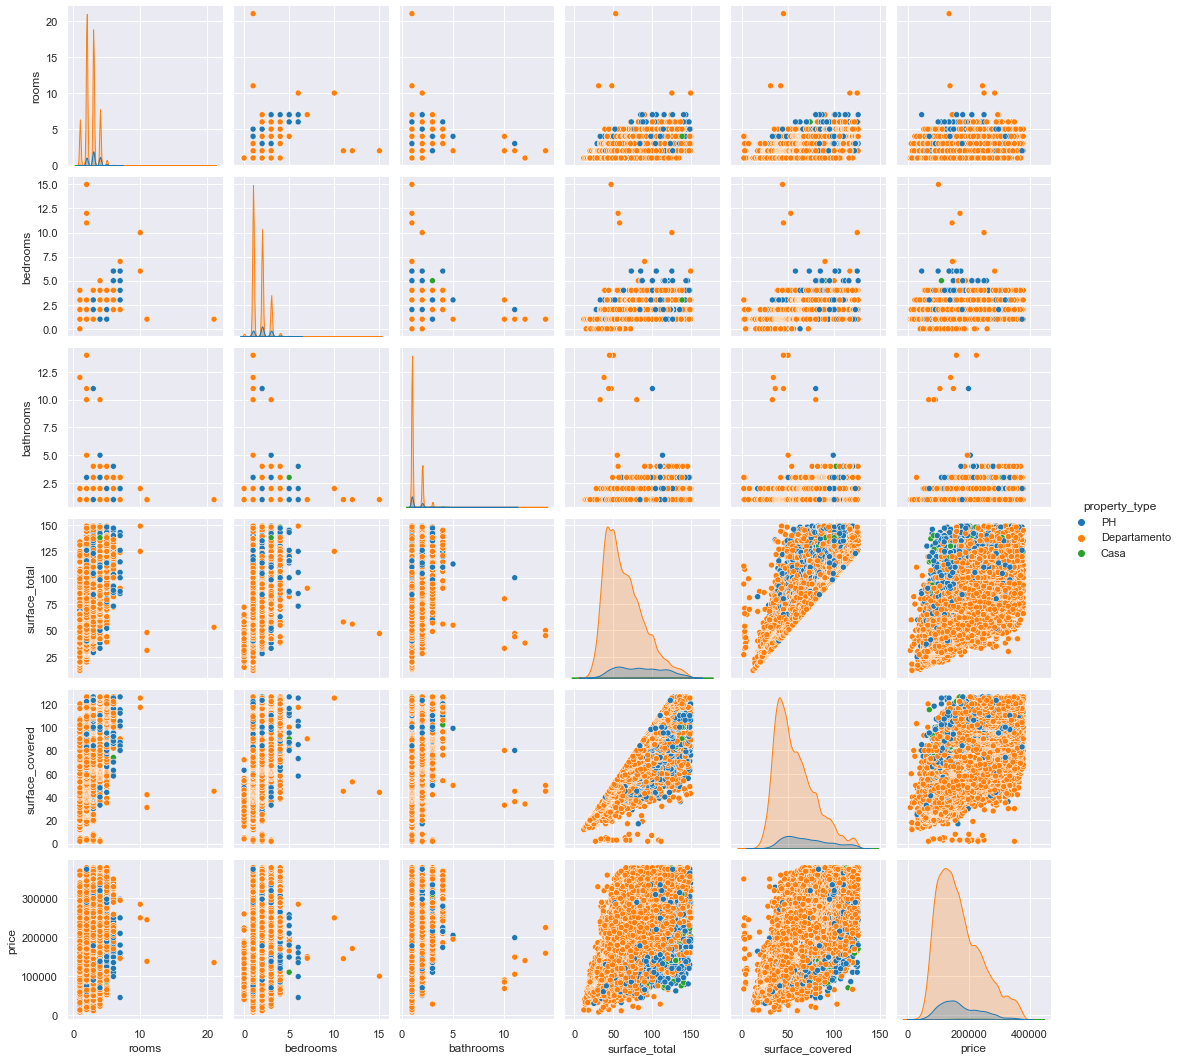

In [28]:
#Graficamos las relaciones a pares entre variables, en función al tipo de propiedad:

sns.set()
sns.pairplot(data_prop3, hue = 'property_type', palette = 'tab10');
plt.savefig('Relaciones de a pares.png')

Según lo que se puede inferir en el gráfico anterior, las dos variables de superficie presentarían una relación con el precio (ya que al aumentar una, aumenta la otra), por lo cual vamos a comprobar esto analizando la correlación de las variables en el punto siguiente.

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

El objetivo de este modelo de Machine Learning es poder predecir el precio de una propiedad a través de la/s variable/s que tengan mayor relación con el mismo, por ello es que en este punto vamos a analizar la correlación entre el precio con las demás variables.

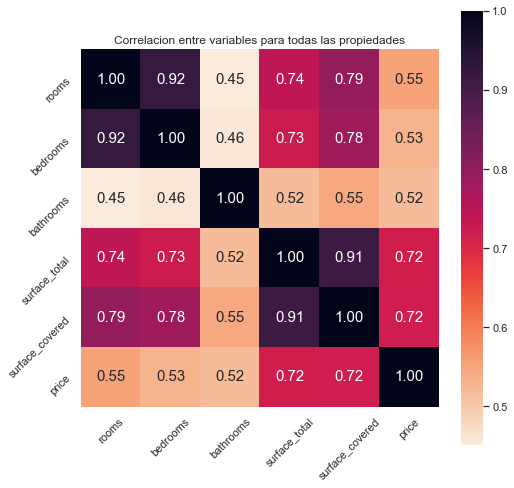

In [29]:
#En primer lugar, calculamos la correlación para nuestro dataset:

corr = data_prop3.drop(columns = ['start_date', 'end_date', 'created_on', 'País', 'Región', 'Barrio','currency', 'title', 'description', 'property_type',
       'operation_type']).corr()

#Luego visualizamos la correlación en las variables a través de un heatmap de Seaborn:

sns.set()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data_prop3.drop(columns = ['start_date', 'end_date', 'created_on', 'País', 'Región', 'Barrio','currency', 'title', 'description', 'property_type',
       'operation_type']).columns, 
           yticklabels= data_prop3.drop(columns = ['start_date', 'end_date', 'created_on', 'País', 'Región', 'Barrio','currency', 'title', 'description', 'property_type',
       'operation_type']).columns,
           cmap= 'rocket_r')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Correlacion entre variables para todas las propiedades')
plt.show()
#plt.savefig('Correlacion general entre variables.png')

Como podemos ver en el gráfico anterior, las dos variables de mayor correlación con el precio son la Superficie Total y Superficie cubierta, ambas con una correlación de 0,72 con el precio. A continuación analizaremos la misma correlación entre variables, para cada uno de los tipos de propiedad.

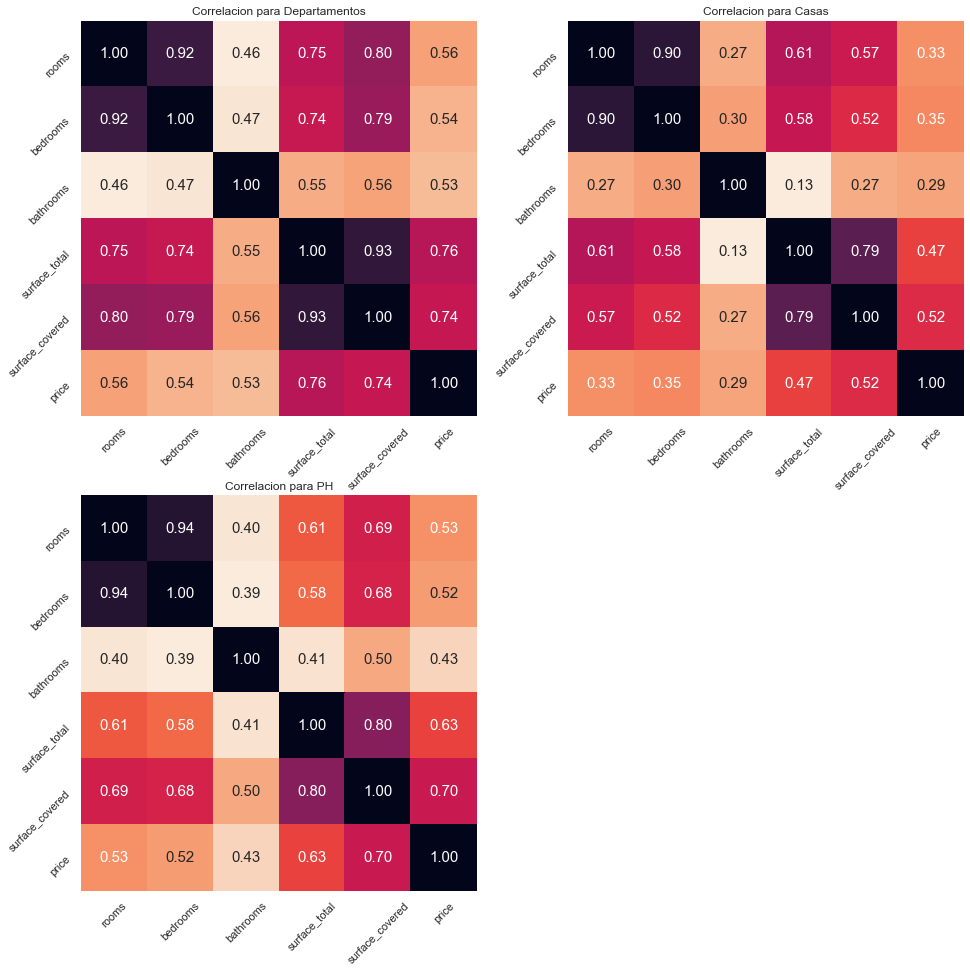

In [30]:
#En primer lugar establecemos las máscaras para filtrar el dataset:

departamentos = data_prop3.property_type == 'Departamento'
casas = data_prop3.property_type == 'Casa'
PH = data_prop3.property_type == 'PH'

#Luego calculamos la correlación entre variables para cada tipo de propiedad:

corr_depto = data_prop3[departamentos].drop(columns = ['start_date', 'end_date', 'created_on', 'País', 'Región', 'Barrio','currency', 'title', 'description', 'property_type',
       'operation_type']).corr()

corr_casa = data_prop3[casas].drop(columns = ['start_date', 'end_date', 'created_on', 'País', 'Región', 'Barrio','currency', 'title', 'description', 'property_type',
       'operation_type']).corr()

corr_PH = data_prop3[PH].drop(columns = ['start_date', 'end_date', 'created_on', 'País', 'Región', 'Barrio','currency', 'title', 'description', 'property_type',
       'operation_type']).corr()

#Por último, graficamos los heatmaps para cada tipo de propiedad:

sns.set()
plt.figure(figsize=(16,16))

#Correlacion entre variables para Departamentos:
plt.subplot(2,2,1)
sns.heatmap(corr_depto, cbar = False,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data_prop3.drop(columns = ['start_date', 'end_date', 'created_on', 'País', 'Región', 'Barrio','currency', 'title', 'description', 'property_type',
       'operation_type']).columns, 
           yticklabels= data_prop3.drop(columns = ['start_date', 'end_date', 'created_on', 'País', 'Región', 'Barrio','currency', 'title', 'description', 'property_type',
       'operation_type']).columns,
           cmap= 'rocket_r')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Correlacion para Departamentos')

#Correlacion entre variables para Casas:
plt.subplot(2,2,2)
sns.heatmap(corr_casa, cbar = False,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data_prop3.drop(columns = ['start_date', 'end_date', 'created_on', 'País', 'Región', 'Barrio','currency', 'title', 'description', 'property_type',
       'operation_type']).columns, 
           yticklabels= data_prop3.drop(columns = ['start_date', 'end_date', 'created_on', 'País', 'Región', 'Barrio','currency', 'title', 'description', 'property_type',
       'operation_type']).columns,
           cmap= 'rocket_r')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Correlacion para Casas')

#Correlacion entre variables para PH:
plt.subplot(2,2,3)
sns.heatmap(corr_PH, cbar = False,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data_prop3.drop(columns = ['start_date', 'end_date', 'created_on', 'País', 'Región', 'Barrio','currency', 'title', 'description', 'property_type','operation_type']).columns, yticklabels= data_prop3.drop(columns = ['start_date', 'end_date', 'created_on', 'País', 'Región', 'Barrio','currency', 'title', 'description', 'property_type',
       'operation_type']).columns,
           cmap= 'rocket_r')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Correlacion para PH')

plt.savefig('Correlación por tipo de propiedad.png')
#plt.show()

Al separar el análisis en nuestros tres tipos de propiedad, vemos también que las variables de superficie total y cubierta son las que tienen mayor correlación con el precio, pero esta correlación es mucho mayor para los Departamentos.

Con todo lo estudiado hasta el momento, se concluye que las dos variables que podemos utilizar como predictoras del precio de los tipos de propiedades analizadas en Capital Federal, son la ***superficie total*** y ***superficie cubierta***.

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


Si bien la mayoría de las propiedades publicadas son de Capital Federal, el dataset contiene información de propiedades de otras regiones de Buenos Aires, por lo que resultaría interesante comparar el valor por metro cuadrado para cada una de las propiedades más publicadas (Departamento, Casa y PH) en las distintas regiones de la provincia, de modo de tener un primer pantallazo de cuál sería la propiedad más barata para cada región. Para realizar esto cargaremos nuevamente el dataset, calcularemos el valor por metro cuadrado en una nueva columna y luego filtraremos el mismo por los 3 tipos de propiedad más publicados.

In [31]:
#En primer lugar, cargamos el dataset nuevamente utilizando las funcionalidades de pandas:

properati = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

#Eliminamos filas duplicadas:

properati = properati.drop_duplicates()

#Luego eliminamos las columnas que no van a ser de utilidad en nuestro análisis:

properati.drop(columns = ['start_date', 'end_date', 'lat', 'lon', 'l1', 'created_on','currency', 'title', 'description','operation_type'], inplace = True)

#Vemos cuantas filas y columnas tiene el dataset, es decir, su "forma":

print(properati.shape)

(144302, 9)


In [32]:
#Renombramos las columnas l1, l2 y l3 por los niveles administrativos correspondientes de la ubicación de las propiedades (país, región o barrio)

properati = properati.rename(columns={'l2':'Región', 'l3':'Barrio'})

#Luego agregamos la columna 'Precio por m2', a traves de la división de las columnas 'price' y 'surface_total':

properati['Precio por m2'] = properati['price'] / properati['surface_total']

#Controlamos los valores de la nueva columna analizando las primeras 5 instancias:

properati.head()

,Región,Barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,Precio por m2
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento,1092.857143
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,2271.428571
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH,2777.777778
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH,3470.588235
4,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,PH,800.000000


In [33]:
'''Como ya sabemos que el dataset contiene valores de superficie total y precio muy elevados y que pueden distorsionar el 
análisis, los eliminamos utilizando el percentil 85 y 95 respectivamente:'''

per_ST = properati.surface_total.quantile(0.85)
per_P = properati.price.quantile(0.95)

#Luego filtramos el dataset utilizando estos valores:

properati = properati[(properati.surface_total <= per_ST) & (properati.price <= per_P)]

#Eliminamos los casos incorrectos donde la superficie cubierta es mayor a la superficie total:

properati = properati[properati.surface_total >= properati.surface_covered]
properati.shape

(101328, 10)

In [34]:
#Por último, creamos un nuevo dataset filtrando los 3 tipos de vivienda que vamos a analizar (Departamento, Casa, PH):

properati1 = properati[(properati.property_type == 'Departamento') | (properati.property_type == 'Casa') | (properati.property_type == 'PH')]

#Vemos la nueva cantidad de instancias:
properati1.shape

(100900, 10)

Luego del filtrado obtenemos un dataset de 100.900 instancias y 10 columnas.

In [35]:
#Obtenemos los cantidad de instancias por propiedad del nuevo dataset:

properati1['property_type'].value_counts()

Departamento    84396
PH              12187
Casa             4317
Name: property_type, dtype: int64

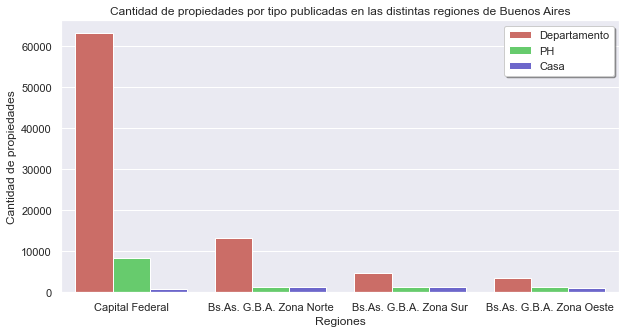

In [36]:
#Comparamos visualmente la cantidad de propiedades por tipo (ordenadas descendentemente) para todas las regiones:

#Establecemos el orden para la región:
regiones = properati1['Región'].value_counts()
orden_r = regiones.index

#Establecemos el tamaño de la figura y el gráfico:
sns.set()
plt.figure(figsize = (10,5))
sns.countplot(data = properati1, x = 'Región', hue = 'property_type', order = orden_r, palette = 'hls')

#Agregamos título y leyenda a los ejes
plt.xlabel('Regiones')
plt.ylabel('Cantidad de propiedades')
plt.title('Cantidad de propiedades por tipo publicadas en las distintas regiones de Buenos Aires');
plt.legend(shadow = True, facecolor = 'white')

plt.show()

Esto nos demuestra los sesgos que puede tener nuestra conclusión, ya que contamos con mucha menos información para las regiones distintas de Capital Federal y para las propiedades distintas de Departamento. Por lo cual, para arribar a una conclusión mas acertada, deberíamos obtener más información acerca de las otras regiones y tipos de propiedades.

In [37]:
#En el siguiente paso, vamos a obtener los precios por metro cuadrado mínimo, máximo y promedio por region:

properati1.groupby('Región').agg({'Precio por m2':['min','mean','max']})

Precio por m2                           
                                   min         mean           max
Región                                                           
Bs.As. G.B.A. Zona Norte     98.958333  2303.714629  27000.000000
Bs.As. G.B.A. Zona Oeste     62.500000  1497.257118  12636.363636
Bs.As. G.B.A. Zona Sur       91.549296  1480.303946   3846.153846
Capital Federal              30.769231  2662.662658  11090.909091

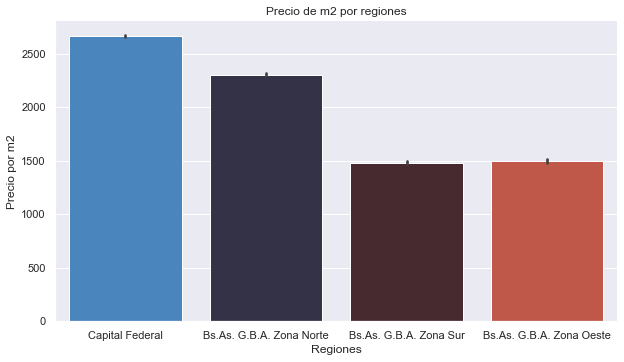

In [38]:
#Comparamos entre las distintas regiones los valores de metro cuadrado promedio a través de un gráfico de barras:

sns.set()
sns.catplot(data = properati1, x = 'Región', y = 'Precio por m2', kind = 'bar', order=orden_r, legend=False, height=4.8, aspect=1.8, palette = 'icefire');

#Agregamos título y leyenda a los ejes:
plt.xlabel('Regiones')
plt.ylabel('Precio por m2')
plt.title('Precio de m2 por regiones')

plt.show()

Podemos observar que en términos generales y sin discriminar por tipo de propiedad, la región con Precio por m2 más elevado es Capital Federal, seguida de Zona Norte, pero también vemos que esta última y Zona Oeste tienen precios máximos por metro cuadrado más elevados, por lo que en esas zonas el precio de la propiedad podría estar afectado también por otros factores distintos de la superficie.

Debido a que nos interesa conocer el precio promedio por tipo de propiedad por cada región, continuaremos el análisis utilizando sólo este valor, y realizaremos la comparación entre tipos de propiedad y regiones a través de un gráfico de barras.

In [39]:
#En primer lugar, creamos una tabla dinámica que incluya el precio promedio por metro cuadrado por región y tipo de propiedad:

m2_prop_reg = properati1.pivot_table(values='Precio por m2', index='Región', columns='property_type', aggfunc=np.mean)
m2_prop_reg

property_type,Casa,Departamento,PH
Región,,,
Bs.As. G.B.A. Zona Norte,1272.102001,2485.283542,1496.227060
Bs.As. G.B.A. Zona Oeste,1014.384282,1785.473527,1096.678439
Bs.As. G.B.A. Zona Sur,960.359258,1740.565098,1027.811926
Capital Federal,1772.181134,2758.325658,2024.271157


Este cuadro nos demuestra que Capital Federal tiene los mayores precios promedio por metro cuadrado para todos los tipos de vivienda, seguido de Zona Norte. A continuación visualizaremos estas conclusiones a través de un gráfico de barras:

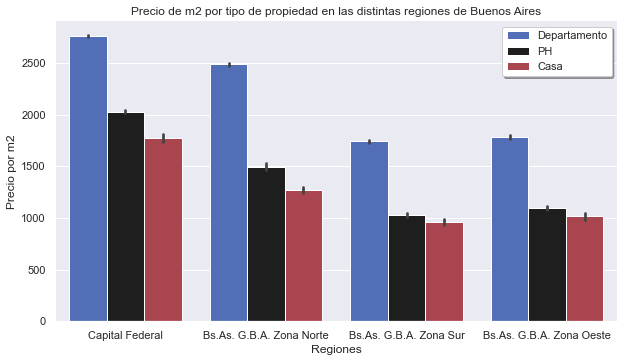

In [40]:
#Establecemos el gráfico:
sns.set()
sns.catplot(data = properati1, x = 'Región', y = 'Precio por m2', hue = 'property_type', kind = 'bar', order=orden_r, legend=False, height=4.8, aspect=1.8, palette = 'icefire');

#Agregamos título y leyenda a los ejes:
plt.xlabel('Regiones')
plt.ylabel('Precio por m2')
plt.title('Precio de m2 por tipo de propiedad en las distintas regiones de Buenos Aires')
plt.legend(shadow = True, facecolor = 'white')

plt.show()

Como consecuencia de este análisis podemos concluir que Capital Federal es la región más cara para vivir y que los departamentos son el tipo de propiedad más costoso sin importar la región, pero también se pueden inferir otras conclusiones como por ejemplo que cuesta menos un metro cuadrado para un PH en Zona Norte, que un metro cuadrado de departamento en cualquiera de las otras regiones.

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [41]:
#En primer lugar, cargamos nuevamente el dataset con el que vamos a trabajar:

properati_ML = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

#Luego eliminamos las columnas que no van a ser de utilidad en nuestro análisis:

properati_ML.drop(columns = ['start_date', 'end_date', 'lat', 'lon', 'l1', 'l3', 'created_on','currency', 'title', 'description','operation_type'], inplace = True)

#Posteriormente filtramos el dataset por los tipos de propiedad que vamos a utilizar en el análisis (Depto., Casa, PH):

properati_ML = properati_ML[(properati_ML.property_type == 'Departamento') | (properati_ML.property_type == 'Casa') | (properati_ML.property_type == 'PH')]

#Filtramos las propiedades ubicadas en Capital Federal:

properati_ML = properati_ML[properati_ML.l2 == 'Capital Federal']

#Seleccionamos las propiedades cuya superficie total esté entre 15 y 1000 m2:

properati_ML = properati_ML[(properati_ML.surface_total >= 15) & (properati_ML.surface_total <= 1000)]

#Seleccionamos las propiedades con precio menor a USD 400000:

properati_ML = properati_ML[properati_ML.price <= 4000000]

#Luego eliminamos las columnas que ya no vamos a utilizar luego del filtrado:

properati_ML.drop(columns = ['property_type', 'l2'], inplace = True)

#Eliminamos los valores faltantes:

properati_ML.dropna(inplace=True)

#Por último, vemos la cantidad de filas y columnas del nuevo dataset:

properati_ML.shape


(81019, 6)

Luego de realizar los filtrados correspondientes, obtenemos un dataset de 81.019 filas y 6 columnas sobre el cual desarrollaremos nuestro modelo. Cabe destacar que en este caso no se eliminaron las filas duplicadas del dataset para cumplir con la consigna.

Como se ha mencionado en el análisis exploratorio de datos, nuestra variable a predecir es el precio (y) y las variables que se utilizarán como predictoras del mismo, o también conocidas como atributos (X), son la Superficie Total y Cubierta. Como nuestra variable 'y' es un valor continuo, los modelos que vamos a trabajar son modelos de regresión.

La métrica que se utilizará para evaluar el desempeño del modelo es **Raíz del error cuadrado promedio (RMSE)**, la cual es una métrica de error, por lo que a más bajo RMSE, mejor desempeño tendrá el modelo.

In [42]:
#En primer lugar, seleccionamos las variables predictoras o atributos (X) y la variable a predecir (y):

X = properati_ML[['surface_total', 'surface_covered']]
y = properati_ML['price']

#Luego seleccionamos el 70% de los datos de X e y como grupo de entrenamiento (train) y el 30% como grupo de prueba (test) del modelo:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Al tratarse de un modelo de regresión, en primer lugar definiremos como Benchmark (modelo base o punto de referencia) a un modelo de **Regresión Lineal**.

# Modelo Benchmark: Regresión Lineal

In [43]:
#Creamos el modelo:
from sklearn.linear_model import LinearRegression

regresion_lineal = LinearRegression()

#Luego, entrenamos el modelo con el grupo de datos de entrenamiento:

regresion_lineal.fit(X_train, y_train)

#Predecimos la los valores de la variable 'y' sobre los grupos de entrenamiento y prueba:

y_train_pred = regresion_lineal.predict(X_train)
y_test_pred = regresion_lineal.predict(X_test)

#Por último, evaluamos el modelo utilizando la métrica elegida (RMSE):
from sklearn.metrics import mean_squared_error

rmse_train = mean_squared_error(y_train, y_train_pred, squared = False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared = False)
print(f'Raíz del error cuadrado promedio en Train: {rmse_train}')
print(f'Raíz del error cuadrado promedio en Test: {rmse_test}')

Raíz del error cuadrado promedio en Train: 216278.7175940256
Raíz del error cuadrado promedio en Test: 218957.05421795265


Esto nos quiere decir que el modelo de regresión lineal estaría estimando el precio de las propiedades en ambos grupos (Train y Test) con un error de más de USD 200.000, valor que se considera elevado. A continuación analizaremos el desempeño del modelo gráficamente:

C:\Users\Javi Dichiachio\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Javi Dichiachio\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


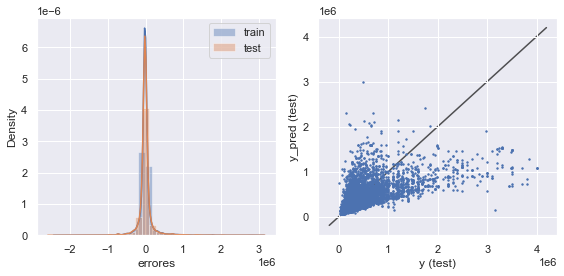

In [44]:
#Analizamos el desempeño del modelo en de los grupos de entrenamiento y prueba gráficamente:

sns.set()
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 30, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 30, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)    
lims = [np.min([ax.get_xlim(), ax.get_ylim()]),np.max([ax.get_xlim(), ax.get_ylim()])]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

Al analizar el histograma vemos que la distribución de errores para los grupos de Train y Test es bastante similar, y al observar el gráfico de comparación entre valores reales y valores predichos para el grupo de prueba vemos que el modelo tiene un mejor desempeño en el caso de propiedades más baratas, pero no obtiene buenas predicciones en el caso de propiedades de mayor valor (los puntos se empiezan a alejar de la curva teórica de estimación). Esto nos podría estar indicando que **no existe** una relación lineal entre las variables.

Una vez definido el modelo Benchmark, a continuación se realizará una comparación entre un modelo de regresión de **Árbol de decisión** y uno de **Vecinos más cercanos (KNN)** para determinar cuál de los dos tiene un mejor desempeño y por lo tanto proponerlo como solución a la problemática planteada, es decir, vamos a seleccionar el modelo de Machine Learning que utilizaremos para tasar las propiedades en la inmobiliaria.

## Modelo 1: Árbol de decisión

In [45]:
#En primer lugar, creamos el modelo de Árbol de decisión, con una máxima profundidad (hiperparámetro max_depth) de 3:
from sklearn.tree import DecisionTreeRegressor

regresion_tree = DecisionTreeRegressor(max_depth=3, random_state=42)

#Luego, entrenamos el modelo con el grupo de datos de entrenamiento:

regresion_tree.fit(X_train, y_train)

#Predecimos la los valores de la variable 'y' sobre los grupos de entrenamiento y prueba:

y_train_pred1 = regresion_tree.predict(X_train)
y_test_pred1 = regresion_tree.predict(X_test)

#Por último, evaluamos el modelo utilizando la métrica elegida (RMSE):
from sklearn.metrics import mean_squared_error

rmse_train1 = mean_squared_error(y_train, y_train_pred1, squared = False)
rmse_test1 = mean_squared_error(y_test, y_test_pred1, squared = False)
print(f'Raíz del error cuadrado promedio en Train: {rmse_train1}')
print(f'Raíz del error cuadrado promedio en Test: {rmse_test1}')

Raíz del error cuadrado promedio en Train: 195917.70338493734
Raíz del error cuadrado promedio en Test: 197581.77355284113


Esto nos quiere decir que el modelo de regresión de Árbol de decisión estaría estimando el precio de las propiedades en ambos grupos (Train y Test) con un error menor al anterior, ya que ambos se encuentran entre los USD 195.000 y USD 200.000, por ende tiene un mejor desempeño. A continuación analizaremos el desempeño del modelo gráficamente:

C:\Users\Javi Dichiachio\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Javi Dichiachio\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


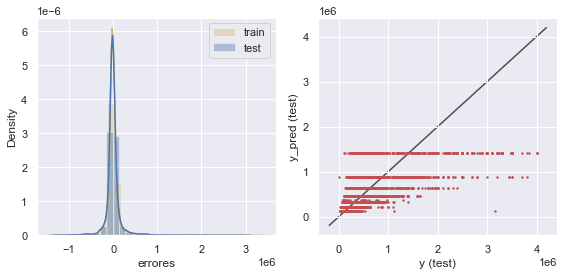

In [46]:
#Analizamos el desempeño del modelo en de los grupos de entrenamiento y prueba gráficamente:

sns.set()
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred1, bins = 30, label = 'train', color = 'y')
sns.distplot(y_test - y_test_pred1, bins = 30, label = 'test', color = 'b')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred1, s =2, color = 'r')    
lims = [np.min([ax.get_xlim(), ax.get_ylim()]),np.max([ax.get_xlim(), ax.get_ylim()])]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

Al analizar el histograma vemos que la distribuión de errores para los grupos de Train y Test es bastante similar, y al observar el gráfico de comparación entre valores reales y valores predichos para el grupo de prueba vemos la distibución escalonada de los valores de las predicciones realizadas, situación que se da por la forma en que opera el árbol de decisión. También en este caso observamos que al incrementar los valores de las propiedades, nos alejamos de la curva teórica de estimación.

El hiperparámetro de máxima profundidad utilizado en el modelo fue seleccionado arbitrariamente, por lo que a continuación se compararán diversos valores que puede tomar este parámetro, y el desempeño del modelo (a través de la métrica RMSE) en cada uno de ellos.

In [47]:
# Definimos las listas vacias para los valores de RMSE deseados:
lista_RMSE_train = []
lista_RMSE_test = []

# Definimos la lista de valores de max_depth que vamos a explorar:
max_depths = [1,2,3,4,5,6,7,8,9,10]

# Generamos un loop sobre los distintos valores de profundidad:
for max_depth in max_depths:
        
    # Definir el modelo con el valor de profundidad
    regresion_tree1 = DecisionTreeRegressor(max_depth = max_depth, random_state=42)
    
    # Entrenar el modelo
    regresion_tree1.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred1 = regresion_tree1.predict(X_train)
    train_RMSE = mean_squared_error(y_train, y_train_pred1, squared = False)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred1 = regresion_tree1.predict(X_test)
    test_RMSE = mean_squared_error(y_test, y_test_pred1, squared = False)
    
    # Agregar la información a las listas
    lista_RMSE_train.append(train_RMSE)
    lista_RMSE_test.append(test_RMSE)

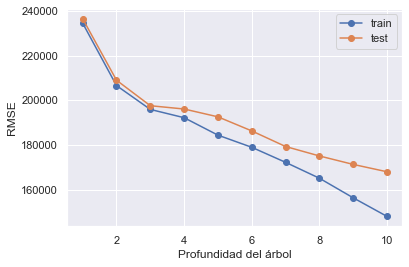

In [48]:
#Luego analizamos el desempeño del modelo para los distintos valores de profundidad gráficamente:

sns.set()
plt.plot(max_depths,lista_RMSE_train,'o-',label='train')
plt.plot(max_depths,lista_RMSE_test,'o-',label='test')
plt.legend()
plt.xlabel('Profundidad del árbol');
plt.ylabel('RMSE');

Como se puede observar en el gráfico, un valor razonable para el hiperparámtero de profundidad del árbol podría ser 7, ya que con él se obtiene un valor de RMSE relativamente bajo y no existe tanta diferencia entre los desempeños de los grupos de entrenamiento y prueba. Dicho esto, a continuación se expone el modelo incluyendo este valor de hiperparámetro y se analiza numéricamente el resultado:

In [49]:
#Creamos el modelo de Árbol de decisión, con una máxima profundidad (hiperparámetro max_depth) de 7:

regresion_tree = DecisionTreeRegressor(max_depth=7, random_state=42)

#Luego, entrenamos el modelo con el grupo de datos de entrenamiento:

regresion_tree.fit(X_train, y_train)

#Predecimos la los valores de la variable 'y' sobre los grupos de entrenamiento y prueba:

y_train_pred1 = regresion_tree.predict(X_train)
y_test_pred1 = regresion_tree.predict(X_test)

#Por último, evaluamos el modelo utilizando la métrica elegida (RMSE):

rmse_train1 = mean_squared_error(y_train, y_train_pred1, squared = False)
rmse_test1 = mean_squared_error(y_test, y_test_pred1, squared = False)
print(f'Raíz del error cuadrático medio en Train: {rmse_train1}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test1}')

Raíz del error cuadrático medio en Train: 172206.16353150917
Raíz del error cuadrático medio en Test: 179300.3153440098


Como podemos ver, al cambiar el valor del hiperparámetro en nuestro modelo los valores de RMSE bajaron por debajo de los USD 180.000 en ambos grupos, por lo que el modelo mejoró su desempeño.

# Modelo 2: Vecinos más cercanos

In [50]:
#En primer lugar, creamos el modelo de Vecinos más cercanos, con una cantidad de vecinos (hiperparámetro n_neighbors) de 4:
from sklearn.neighbors import KNeighborsRegressor

regresion_KNN = KNeighborsRegressor(n_neighbors=4)

#Luego, entrenamos el modelo con el grupo de datos de entrenamiento:

regresion_KNN.fit(X_train, y_train)

#Predecimos la los valores de la variable 'y' sobre los grupos de entrenamiento y prueba:

y_train_pred2 = regresion_KNN.predict(X_train)
y_test_pred2 = regresion_KNN.predict(X_test)

#Por último, evaluamos el modelo utilizando la métrica elegida (RMSE):
from sklearn.metrics import mean_squared_error

rmse_train2 = mean_squared_error(y_train, y_train_pred2, squared = False)
rmse_test2 = mean_squared_error(y_test, y_test_pred2, squared = False)
print(f'Raíz del error cuadrado promedio en Train: {rmse_train2}')
print(f'Raíz del error cuadrado promedio en Test: {rmse_test2}')

Raíz del error cuadrado promedio en Train: 139782.2643202136
Raíz del error cuadrado promedio en Test: 169699.87577869956


Al analizar los resultados obtenidos para el modelo de regresión de vecinos más cercanos, observamos que hasta el momento es el que mejor desempeño tiene, ya que se obtuvieron menores valores de RMSE para los grupos de entrenamiento y prueba, ambos por debajo de los USD 170.000. 

Resulta importante destacar también que en este modelo es cuando se observa mayor diferencia en el RMSE para los grupos de entrenamiento y de prueba, siendo el primero sustancialmente menor al segundo.

C:\Users\Javi Dichiachio\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Javi Dichiachio\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


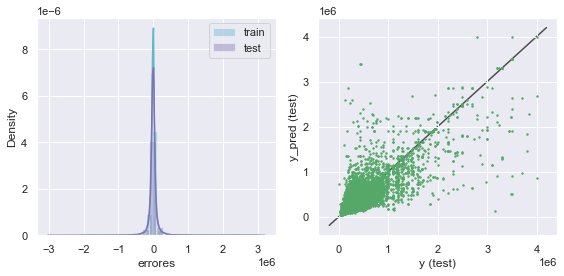

In [51]:
#Analizamos el desempeño del modelo en de los grupos de entrenamiento y prueba gráficamente:

sns.set()
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred2, bins = 30, label = 'train', color='c')
sns.distplot(y_test - y_test_pred2, bins = 30, label = 'test', color='m')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred2, s =2, color = 'g')    
lims = [np.min([ax.get_xlim(), ax.get_ylim()]),np.max([ax.get_xlim(), ax.get_ylim()])]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

A simple vista, este modelo es el que mejor desempeño tiene de los 3 ya que tiene un RMSE menor y se observa un mejor comportamiento entre las valores reales y predichos en el grupo de prueba, obteniendo puntos cerca de la curva teórica al incrementar los valores de las propiedades.

Al igual que en el modelo de Árbol de decisión, el hiperparámetro utilizado en el modelo (n_neighbors) fue seleccionado arbitrariamente, por lo que a continuación se compararán diversos valores que puede tomar este parámetro, y el desempeño del modelo (a través de la métrica RMSE) en cada uno de ellos.

In [52]:
# Definimos las listas vacias para los valores de RMSE deseados:
lista_RMSE_train1 = []
lista_RMSE_test1 = []

# Definimos la lista de valores de k (número de vecinos) que vamos a explorar:
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos en loop sobre los distintos valores de k: 
for k in k_vecinos:
    
    # Definir el modelo con el valor de vecinos deseado
    regresion_KNN1 = KNeighborsRegressor(n_neighbors = k)
    
    # Entrenar el modelo
    regresion_KNN1.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred2 = regresion_KNN1.predict(X_train)
    train_RMSE1 = mean_squared_error(y_train, y_train_pred2, squared = False)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred2 = regresion_KNN1.predict(X_test)
    test_RMSE1 = mean_squared_error(y_test, y_test_pred2, squared = False)
    
    # Agregar la información a las listas
    lista_RMSE_train1.append(train_RMSE1)
    lista_RMSE_test1.append(test_RMSE1)

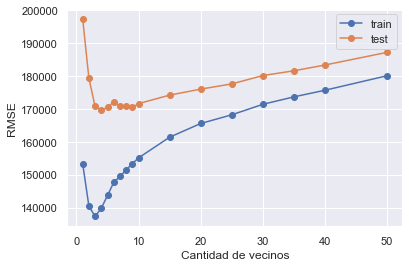

In [53]:
#Luego analizamos el desempeño del modelo para las distintos números de vecinos gráficamente:

sns.set()
plt.plot(k_vecinos,lista_RMSE_train1,'o-',label='train')
plt.plot(k_vecinos,lista_RMSE_test1,'o-',label='test')
plt.legend()
plt.xlabel('Cantidad de vecinos');
plt.ylabel('RMSE');

Como se puede observar en el gráfico, un valor razonable para el hiperparámtero de cantidad de vecinos podría ser 10, ya que con él se obtiene un valor de RMSE relativamente bajo y no existe tanta diferencia entre los desempeños de los grupos de entrenamiento y prueba. Esto nos dice que el modelo no estaría sobreajustando sobre los datos de entrenamiento, situación que se daba anteriormente al existir mayor diferencia entre los RMSE de ambos grupos. Dicho esto, a continuación se expone el modelo incluyendo este valor de hiperparámetro y se analiza numéricamente el resultado:

In [54]:
#En primer lugar, creamos el modelo de Vecinos más cercanos, con una cantidad de vecinos (hiperparámetro n_neighbors) de 10:
from sklearn.neighbors import KNeighborsRegressor

regresion_KNN = KNeighborsRegressor(n_neighbors = 10)

#Luego, entrenamos el modelo con el grupo de datos de entrenamiento:

regresion_KNN.fit(X_train, y_train)

#Predecimos la los valores de la variable 'y' sobre los grupos de entrenamiento y prueba:

y_train_pred2 = regresion_KNN.predict(X_train)
y_test_pred2 = regresion_KNN.predict(X_test)

#Por último, evaluamos el modelo utilizando la métrica elegida (RMSE):

rmse_train2 = mean_squared_error(y_train, y_train_pred2, squared = False)
rmse_test2 = mean_squared_error(y_test, y_test_pred2, squared = False)
print(f'Raíz del error cuadrático medio en Train: {rmse_train2}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test2}')

Raíz del error cuadrático medio en Train: 155108.88245152103
Raíz del error cuadrático medio en Test: 171623.25241177526


Al ver los números obtenidos podemos concluir que al utilizar 10 vecinos, se obtiene un RMSE similar sobre el grupo de prueba, y se reduce la brecha entre este último y el RMSE obtenido en el grupo de entrenamiento, por lo cual el modelo no estaría sobreajustando.

# Conclusión:

En función a los resultados obtenidos en los 3 modelos, el de **mejor desempeño** es el de **Vecinos más cercanos** ya que se obtiene un menor RMSE, pero aún considero que los valores de error son elevados al momento de realizar la predicción, por lo que habría que desarrollar un modelo que contemple también otras características de las viviendas de carácter cualitativo pero que también influyan en el precio, como por ejemplo el Barrio donde se encuentra la propiedad.

Para finalizar, a continuación se incluye una función que permite realizar una estimación del precio de una propiedad en Capital Federal utilizado el modelo de Machine Learning elegido (Vecinos más cercanos), en función a los valores de las variables de Superficie Total y Cubierta elegidas por el usuario:

In [55]:
def predecir_precio():
    '''Retorna el valor estimado de una propiedad en Capital Federal en función a los parámetros ingresados por el usuario'''
    
    superficie_total = float(input('Ingrese la superficie total deseada en m2:'))
    superficie_cubierta = float(input('Ingrese la superficie cubierta deseada en m2:'))
    
    datos_ingresados = np.array([superficie_total, superficie_cubierta]).reshape(1,-1)
    
    prediccion = regresion_KNN.predict(datos_ingresados)
    
    print('El valor de la propiedad para los datos ingresados sería de: USD', int(prediccion[0]))

In [60]:
predecir_precio()

Ingrese la superficie total deseada en m2: 100
Ingrese la superficie cubierta deseada en m2: 80


El valor de la propiedad para los datos ingresados sería de: USD 208600
